In [32]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import joblib
import nltk
import re
import tensorflow as tf
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [33]:
#reading in the new fold data
df = pd.read_csv('depression_folds.csv')

In [34]:
df.head()

,depression,text,kfold
0,1,@benj_fry Lysi fish oil for vitamin D against ...,0
1,1,"RT @QistinaFaiqah: During pms, the progesteron...",0
2,1,@infcomment How great is the risk of a second ...,0
3,0,RT @Allnodes: We are happy to announce that #A...,0
4,0,@montanadevy happy birthday,0


### Text Preporcessing

In [42]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@[a-z0-9]\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [43]:
def preprocess(text, stem = False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()  
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [44]:
df.text = df.text.apply(lambda x: preprocess(x))

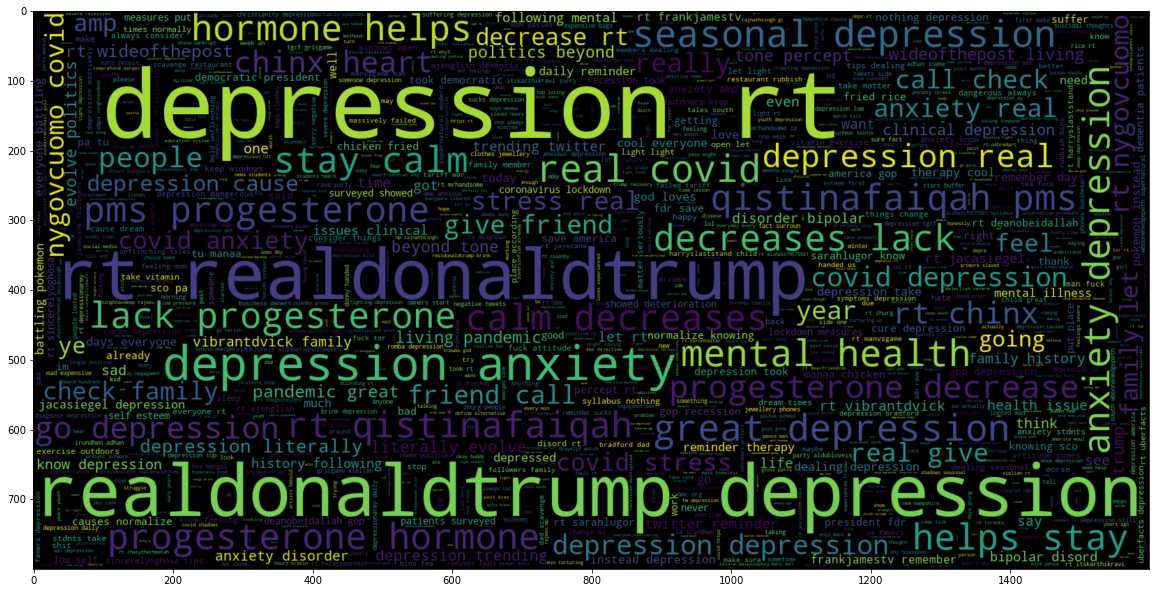

In [45]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(df[df.depression == 1].text))
plt.imshow(wc, interpolation= 'bilinear')

In [16]:
df.head()

,depression,text,kfold
0,1,hate people throw word depressed depression ar...,0
1,1,rt nygovcuomo covid anxiety real covid stress ...,0
2,0,rt sesimyourgirl happy 39th birthday shoo happ...,0
3,1,rt indiametdept depression northwest bay benga...,0
4,1,rt jacasiegel depression trending twitter remi...,0


### MODEL BUILDING

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
cv = count_vectorizer.fit_transform(df['text'])
cv.shape

(20000, 21567)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cv, df['depression'], test_size = 0.2, 
                                                    stratify = df['depression'], random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.96825